<a href="https://colab.research.google.com/github/hewyiwei/MA0218-Data-Science-Artificial-Intelligence/blob/main/Opheodrys'_MA0218_Mini_Project_(Aviation_Accidents)(23/3/2022).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_Set_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans as kmeans
from sklearn.neighbors import LocalOutlierFactor as lof
sb.set()
warnings.filterwarnings("ignore")

In [59]:
dataSet = pd.read_csv("AviationData.csv")
print(dataSet.shape[0])
dataSet.head(200)

87282


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,20020917X02166,Accident,LAX82DA055,1982-01-30,"AVALON, CA",United States,NaN,NaN,AVX,SANTA CATALINA,...,Personal,NaN,0.0,0.0,0.0,4.0,VMC,Climb,Probable Cause,30-01-1983
196,20020917X02313,Accident,LAX82FVA11,1982-01-30,"OAKDALE, CA",United States,NaN,NaN,027,OAKDALE,...,Personal,NaN,1.0,0.0,0.0,0.0,VMC,Takeoff,Probable Cause,30-01-1983
197,20020917X02248,Accident,LAX82DVG15,1982-01-30,"REDDING, CA",United States,NaN,NaN,O85,BENTON AIRPORT,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Taxi,Probable Cause,30-01-1983
198,20020917X02168,Accident,LAX82DA057,1982-01-30,"ELKO, NV",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Cruise,Probable Cause,30-01-1983


In [60]:
dataSet.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [61]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                87282 non-null  object 
 1   Investigation.Type      87282 non-null  object 
 2   Accident.Number         87282 non-null  object 
 3   Event.Date              87282 non-null  object 
 4   Location                87230 non-null  object 
 5   Country                 87056 non-null  object 
 6   Latitude                33073 non-null  object 
 7   Longitude               33064 non-null  object 
 8   Airport.Code            49321 non-null  object 
 9   Airport.Name            51955 non-null  object 
 10  Injury.Severity         86399 non-null  object 
 11  Aircraft.damage         84272 non-null  object 
 12  Aircraft.Category       30783 non-null  object 
 13  Registration.Number     85965 non-null  object 
 14  Make                    87219 non-null

In [62]:
#removing some columns not needed
dataSetClean = pd.DataFrame(dataSet.drop(["Latitude", "Longitude", "Airport.Code", "Airport.Name","Aircraft.damage","Schedule", "Air.carrier", "Report.Status", "Publication.Date"], axis = 1))

In [64]:
#removing duplicate entries
eventIDs = []
index = 0

while index < dataSet.shape[0]:
  if not(dataSet.iloc[index,0] in eventIDs):
    eventIDs.append(dataSet.iloc[index,0])
    index += 1
  else:
    dataSet = dataSet.drop(index)
    dataSet = dataSet.reset_index(drop = True)

In [65]:
dataSet.shape

(86370, 31)

In [23]:
dataSetClean["Injury.Severity"].value_counts()

Non-Fatal     66561
Fatal(1)       6167
Fatal          4959
Fatal(2)       3711
Incident       2219
              ...  
Fatal(228)        1
Fatal(229)        1
Fatal(80)         1
Fatal(217)        1
Fatal(72)         1
Name: Injury.Severity, Length: 107, dtype: int64

In [24]:
#add a column to classify fatal or non-fatal accidents
dataSetClean.insert(len(dataSetClean.columns), "Fatal/Non-Fatal", value = "string")

In [25]:
#re-categorize as fatal or non-fatal, this takes ages to run idk if speed is a factor in this proj
for rows in range(len(dataSetClean.index)):
    if dataSetClean.loc[rows,"Injury.Severity"] == "Non-Fatal" or dataSetClean.loc[rows,"Injury.Severity"] == "Incident":
        dataSetClean.loc[rows,"Fatal/Non-Fatal"] = "Non-Fatal"
    else:
        dataSetClean.loc[rows,"Fatal/Non-Fatal"] = "Fatal"

In [26]:
dataSetClean.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.Category,Registration.Number,Make,...,Engine.Type,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Fatal/Non-Fatal
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),NaN,NC6404,Stinson,...,Reciprocating,NaN,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Fatal
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),NaN,N5069P,Piper,...,Reciprocating,NaN,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Fatal
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),NaN,N5142R,Cessna,...,Reciprocating,NaN,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Fatal
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),NaN,N1168J,Rockwell,...,Reciprocating,NaN,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Fatal
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),NaN,N15NY,Cessna,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Fatal


<Figure size 1152x576 with 0 Axes>

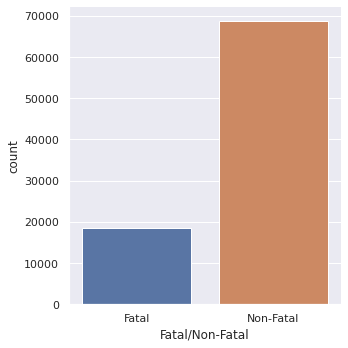

In [27]:
f = plt.figure(figsize = (16,8))
sb.catplot(x = "Fatal/Non-Fatal", data = dataSetClean, kind = "count")

In [28]:
dataSetClean["Weather.Condition"].value_counts()

VMC    76251
IMC     5944
UNK      856
Unk      253
Name: Weather.Condition, dtype: int64

<Figure size 1152x576 with 0 Axes>

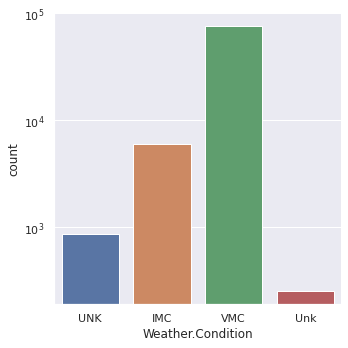

In [29]:
f = plt.figure(figsize = (16,8))
f = sb.catplot(x = "Weather.Condition", data = dataSetClean, kind = "count", log = True)

<Figure size 1152x576 with 0 Axes>

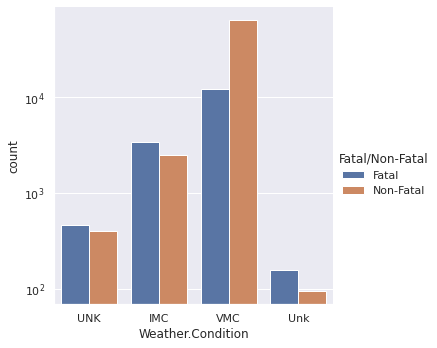

In [30]:
f = plt.figure(figsize = (16,8))
sb.catplot(x = "Weather.Condition" , hue = "Fatal/Non-Fatal", data = dataSetClean, kind = "count", log = True)

In [31]:
for columns in dataSetClean.columns:
    if columns.dtype == ""

SyntaxError: ignored